# Sampling Distributions and the Central Limit Theorem

**Definition.** For a fixed population and fixed sample size $k\in \mathbb{N}$, a collection of values of the mean over $n$ samples of size $k$ forms what we call a **sampling distribution**.

Suppose that we have a sampling distribution:

$$X =\left\{X_1, X_2, \cdots, X_n\right\}$$

For a sampling distribution, we know that:
- The sample size is $k$ for all $X_i$.
- The number of samples in our sampling distribution is $n$.

We refer to the **grand mean** $\bar x$ as the mean of the $n$ sample means, e.g.

$$\bar x = \sum_{i=1}^n\frac{\bar x_i}{n}$$

Two vital theorems govern how sampling distributions work:

1. **Central Limit Theorem.** The means $\bar x_i$ of a sampling distribution are approximately normal (bell-shaped) and centered upon $\mu_0$, the population average. Additionally, as sample size $k$ increases, $\bar x \rightarrow \mu_0$.
2. **Law of Large Numbers.** As the number of samples $n$ in our sampling distribution increases, our estimates of the population mean $\mu_0$ increase in accuracy.

Thus, the CLT guarantees a bell-shaped distribution centered upon the population average, and the Law of Large Numbers works like a lever that allows us to control the accuracy. Increased sample size $k$ leads to increased accuracy by the CLT, and increased number of samples $n$ leads to increased accuracy by the Law of Large Numbers.

The Law of Large Numbers is vital due to the fact that the sample size is often limited. For example, sample size should be kept to less than $10\%$ of the population size. The population of all SAT scores for Forsyth County, GA, in 2025 may contain a few thousand items, while the population of SAT scores for the United States will contain millions of items. When the size of the population the sampling distribution is drawn from is limited, the Law of Large Numbers allows us to take many more samples to improve accuracy.

## Law of Large Numbers

If $\bar x$ is the grand mean of $n$ many sample averages $\bar x_i$ which all have the same sample size $k$ and are drawn from the same population (or distribution) with mean $\mu$, then

$$n \rightarrow \infty \implies \bar{x} \rightarrow \mu$$

## Central Limit Theorem

Assume $\bar x$ is the grand mean of $n$ many sample averages $\bar x_i$ which are all have the sample size $k$ and are drawn from the same population (or distribution) with mean $\mu$ and population standard deviation $\sigma$. For large values of $k$, this sampling distribution can be assumed approximately normal. Specifically, the sampling distribution can be assumed to be

$$N\left(\mu, \frac{\sigma}{\sqrt{k}} \right)$$

## Essential Tools

We will need some data sets to work with:

In [1]:
united <- read.csv('http://faculty.ung.edu/rsinn/data/united.csv')
p <- read.csv('http://faculty.ung.edu/rsinn/data/personality.csv')
airports <- read.csv('http://faculty.ung.edu/rsinn/data/airports.csv')
births <-  read.csv('http://faculty.ung.edu/rsinn/data/baby.csv')

We also need for the function **sample.data.frame()** to be active in this notebook, so we copy-paste it from our [online course notes](https://straightdraw.github.io/probstat/S1c.html).

In [2]:
sample.data.frame <- function(x, size, replace = FALSE, prob = NULL, groups=NULL, 
                              orig.ids = TRUE, fixed = names(x), shuffled = c(),
                              invisibly.return = NULL, ...) {
  if( missing(size) ) size = nrow(x)
  if( is.null(invisibly.return) ) invisibly.return = size>50 
  shuffled <- intersect(shuffled, names(x))
  fixed <- setdiff(intersect(fixed, names(x)), shuffled)
  n <- nrow(x)
  ids <- 1:n
  groups <- eval( substitute(groups), x )
  newids <- sample(n, size, replace=replace, prob=prob, ...)
  origids <- ids[newids]
  result <- x[newids, , drop=FALSE]
  
  idsString <- as.character(origids)
  
  for (column in shuffled) {
    cids <- sample(newids, groups=groups[newids])
    result[,column] <- x[cids,column]
    idsString <- paste(idsString, ".", cids, sep="")
  }
  
  result <-  result[ , union(fixed,shuffled), drop=FALSE]
  if (orig.ids) result$orig.id <- idsString
  
  
  if (invisibly.return) { return(invisible(result)) } else {return(result)}
}

## Example: Estimating Narcissism

Let's work with an example from the **personality** data set: narcissism. Let's generate many, many samples of the same size. We'll find the averages from each sample and use them to estimate the average level of narcissism for students at UNG.

### First Step: Generating Samples of Size $n=10$

Let's beging with the R commands necessary to sample the **Narc** column in the *personality* data frame. We will use the

<p style="color:red;">sample.data.frame()</p>

function to draw a sample.

**Run the cell below to see how this works, and notice:**

- The function inputs:
1. Name of the data frame to sample from.
2. Sample size to be drawn.
- The output: 10 rows from the data frame with all columns present.

In [3]:
s <- sample.data.frame(p, 10, orig.ids = FALSE)
head(s,15)

,Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,⋯,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
,<int>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
89,18,1,F,N,N,1,Y,N,N,3.21,⋯,109,10,136,10,3,38,30,16,31,SD
8,20,3,F,N,N,1,Y,N,N,3.30,⋯,142,17,168,16,9,55,45,24,29,AF
28,19,1,F,N,N,1,N,N,N,3.18,⋯,112,9,170,11,7,52,47,23,15,SE
126,19,1,F,N,N,3,N,N,N,4.00,⋯,133,14,150,1,0,51,47,25,33,SE
71,19,3,F,N,N,1,Y,N,N,3.15,⋯,106,9,131,9,4,48,42,27,22,AF
15,24,2,F,Y,Y,3,N,N,N,2.05,⋯,107,14,108,9,8,31,32,33,32,AG
44,19,3,F,N,N,3,N,N,N,3.00,⋯,107,10,149,14,6,48,42,15,17,AF
5,24,3,M,Y,N,2,N,N,N,2.39,⋯,95,5,166,14,10,56,46,27,20,AF
47,20,2,F,N,N,1,N,N,N,2.90,⋯,85,7,170,12,6,53,42,37,26,AF


We can find the average narcissism for these 10 persons by subsetting our sample data frame **s**.

In [4]:
mean(s[ , 'Narc'])

[1] 5.5

**Putting it Together.** Eventually, we want to run a loop that does this a thousand or more times. Thus, we prefer a single line of code that will do it for us all at once. We wrap the *sample.data.frame()* function inside the *mean* function as shown below.

**Run the code below multiple times to see how we're sampling plus finding the average Narcissism level for each.**

In [5]:
mean(sample.data.frame(p, 10, orig.ids = F)[ , 'Narc'])

[1] 5.1

### Step 2: Creating a for Loop

The steps make sense if we consider them separately:

1. Create **all_means**, an initially empty vector where we plan to store our sample means.
2. Create a for loop that will a thousand times.
3. Inside the loop, we will:
  - Gather a sample of size $n=10$.
  - Calcuate the mean.
  - Add this value to the **all_means** vector.

In [6]:
all_means <- c()                                         #Empty vector to store all the sample means
for (count in 1:1000){
    sample <- sample.data.frame(p, 10, orig.ids = F)     #Generate a sample (size n=10)
    all_means[count] <- mean(sample[ , 'Narc'])          #Save the mean of this sample in my list
}

Notice that we now have a vector **all_means**, so we display the distribution in a histogram and caculate various statistics.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.300   4.100   4.700   4.707   5.300   7.100 

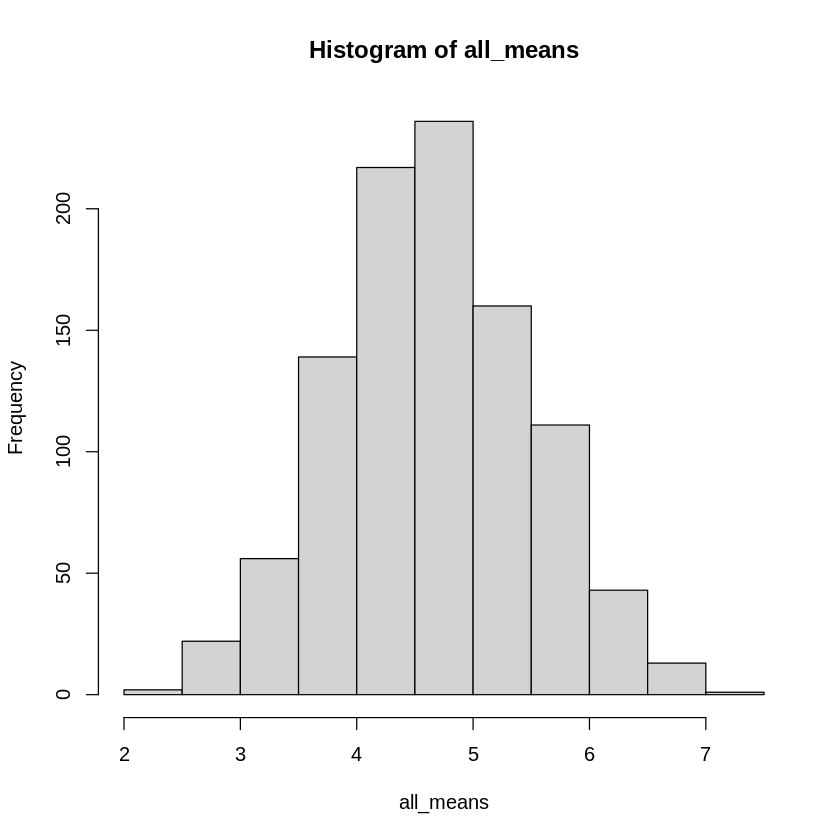

In [7]:
summary(all_means)
hist(all_means)

### Step 3: The Middle 90% of the Distribution

Because we intend to use the sampling distributions to estimate the population average, we need a way to gather an interval. This interval will be our estimated range of values. For the moment, let's use the **middle 90%** of the **all_means** vector. We will need the endpoints, e.g. the 5th and 95th percentiles from the vector.

In [8]:
lower <- quantile(all_means, prob = 0.05)     # Calcuate the 5th percentile.
upper <- quantile(all_means, prob = 0.95)     # Calcuate the 95th percentile.
cat('The middle 90% of the all_means vector is (',lower,',',upper,').')

The middle 90% of the all_means vector is ( 3.3 , 6.1 ).

### Step 4: The Histogram with Vertical Lines Showing the 5th and 95th Percentiles

We use the function **abline()** to superimpose vertical lines onto our histogram. We've already calculated the values for the 5th and 95th percentiles. We need only to use the option **v** which draws a *vertical line* at the value indicated. The color option is not vital for our purposes, but a splash of color is visually appealing.

As we go forward, we will see that increased sample size will lead to a narrower bell-shape. In other words, the size of the standard deviation will become important, so let's include that in the text we print out using the **cat()** function.

Standard deviation of sampling distribution: 0.840733 
The middle 90% of the sampling distribution: is ( 3.3 , 6.1 ).

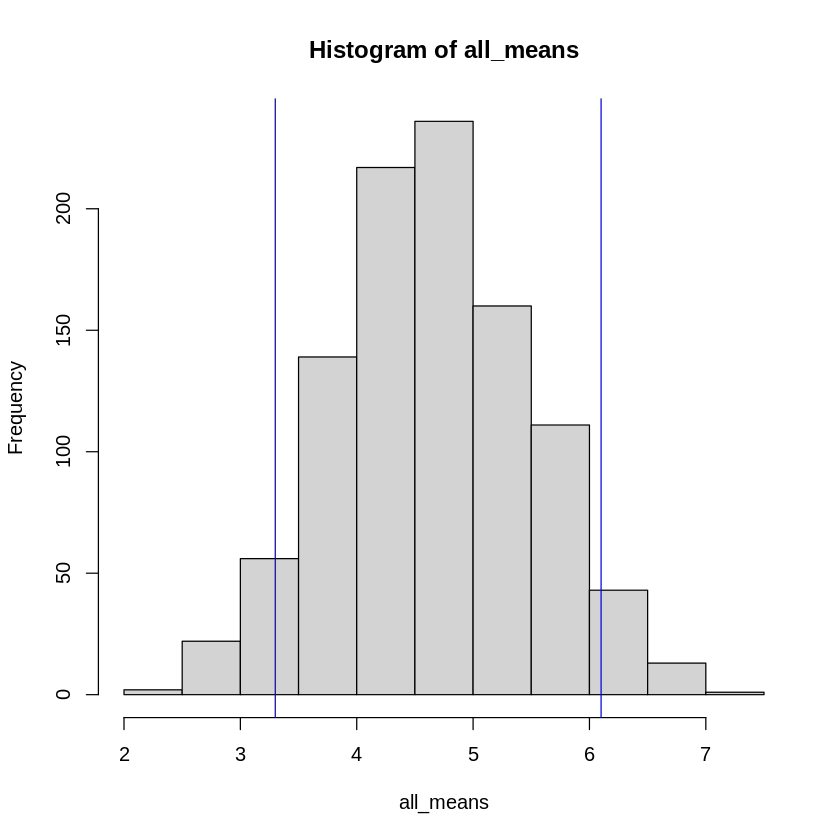

In [9]:
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of the sampling distribution: is (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

### Step 5: Performing all Tasks in 1 Code Block

Now that we have unpacked each command line needed, we can put it all together into one code block. Doing so will help to quickly generate different sampling distributions for different sample sizes **n**.

Standard deviation of sampling distribution: 0.8230414 
The middle 90% of sampling distribution: ( 3.395 , 6.1 ).

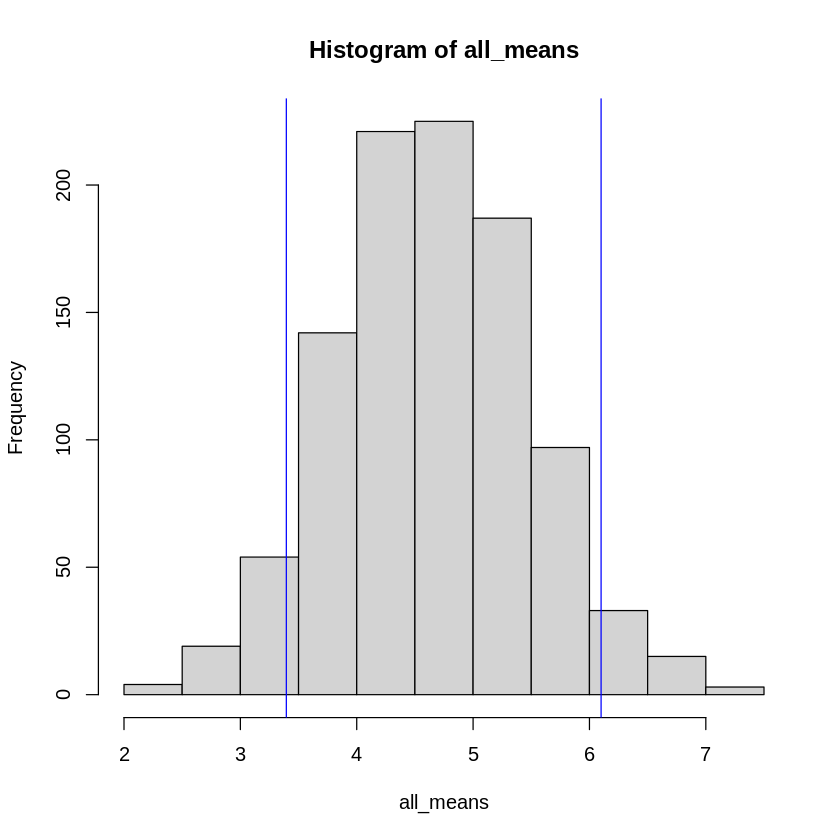

In [10]:
all_means <- c()                                           #Empty vector to store all the sample means

for (count in 1:1000){
    sample <- sample.data.frame(p, 10, orig.ids = F)       #Controls sample size
    all_means[count] <- mean(sample[ , 'Narc'])
}

upper <- quantile(all_means, prob = 0.95)
lower <- quantile(all_means, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(all_means), '\nThe middle 90% of sampling distribution: (',lower,',',upper,').')
hist(all_means)
abline( v = lower, col="blue")
abline(v = upper, col="blue")

### Generating Samples of Size $n=20$

We can tweak the code slightly to increase the sample size to $n = 20$. Notice that we are adding a number to the variables. Why? Rather than overwriting the variables over and over, we can create slightly different versons of the variables to avoid confusion later.

Standard deviation of sampling distribution: 0.5871357 
The middle 90% of sampling distribution: ( 3.75 , 5.65 ).

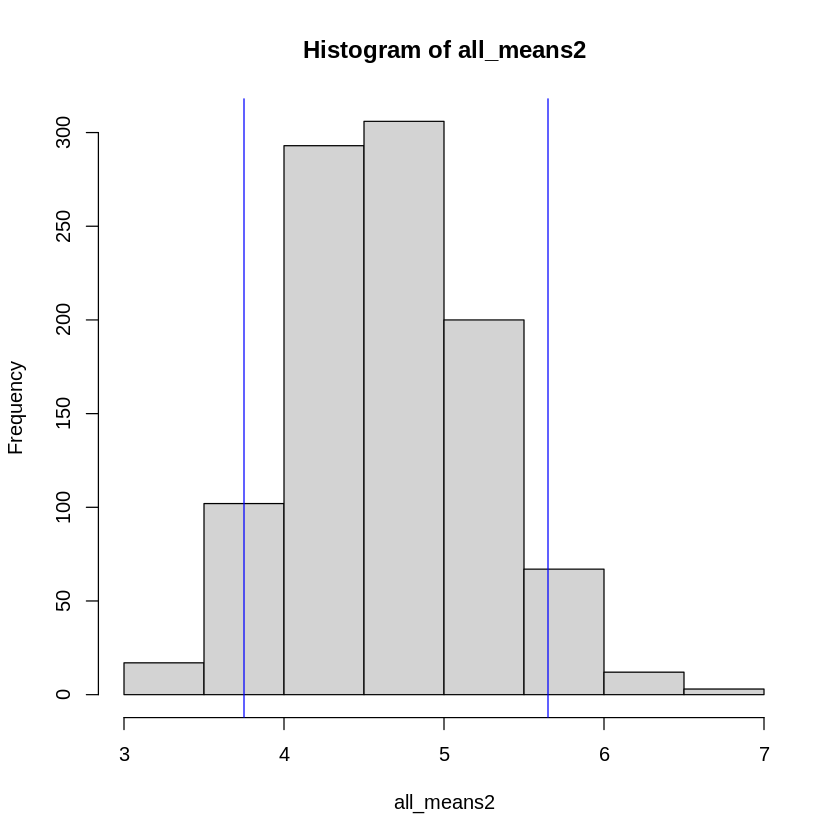

In [11]:
all_means2 <- c()                                           #Empty vector to store all the sample means

for (count in 1:1000){
    sample <- sample.data.frame(p, 20, orig.ids = F)        #Controls sample size
    all_means2[count] <- mean(sample[ , 'Narc'])
}

upper2 <- quantile(all_means2, prob = 0.95)
lower2 <- quantile(all_means2, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(all_means2), '\nThe middle 90% of sampling distribution: (',lower2,',',upper2,').')
hist(all_means2)
abline( v = lower2, col="blue")
abline(v = upper2, col="blue")

### What Happened to Standard Deviation?

What happened to the standard deviation when we increased sample size from $n=10$ to $n=20$?

In [12]:
sd(all_means)
sd(all_means2)

[1] 0.8230414

[1] 0.5871357

### Generating Samples of Size $n=40$

The next step in our progression will be samples of size $n=40$.

Standard deviation of sampling distribution: 0.3620616 
The middle 90% of sampling distribution: ( 4.075 , 5.275 ).

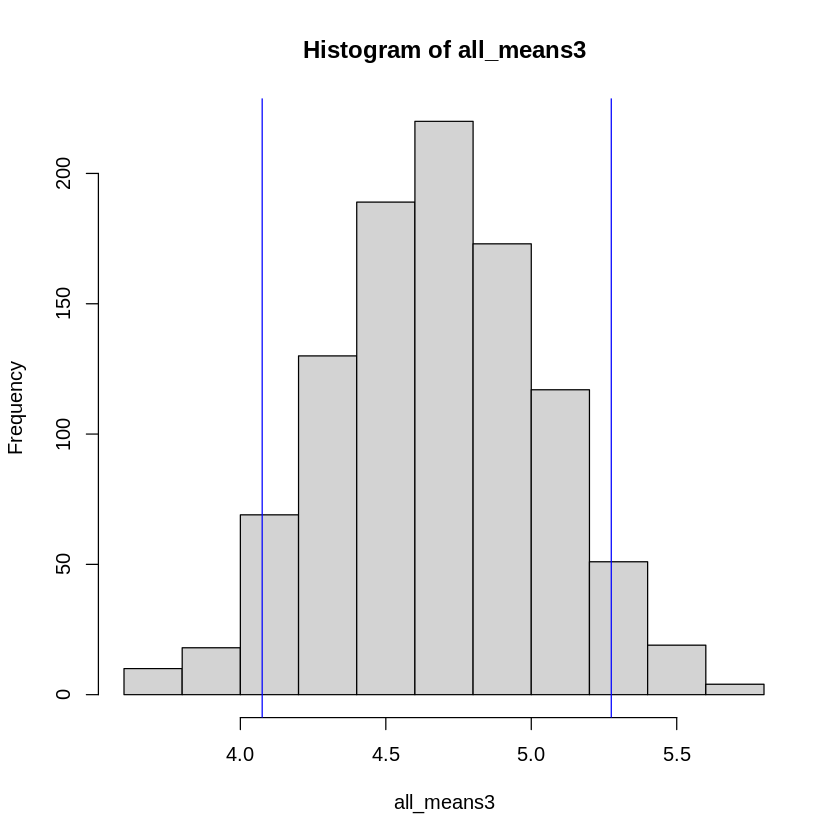

In [13]:
all_means3 <- c()                                           #Empty vector to store all the sample means

for (count in 1:1000){
    sample <- sample.data.frame(p, 40, orig.ids = F)        #Controls sample size
    all_means3[count] <- mean(sample[ , 'Narc'])
}

upper3 <- quantile(all_means3, prob = 0.95)
lower3 <- quantile(all_means3, prob = 0.05)
cat("Standard deviation of sampling distribution:", sd(all_means3), '\nThe middle 90% of sampling distribution: (',lower3,',',upper3,').')
hist(all_means3)
abline( v = lower3, col="blue")
abline(v = upper3, col="blue")

In [14]:
### Comparing Standard Deviations

cat('For sample size of 10, the standard deviation was ', sd(all_means))

cat('For sample size of 20, the standard deviation was ', sd(all_means2))

cat('For sample size of 40, the standard deviation was ', sd(all_means3))

For sample size of 10, the standard deviation was  0.8230414For sample size of 20, the standard deviation was  0.5871357For sample size of 40, the standard deviation was  0.3620616

#### Cleaning Up Output with Hard Returns

The '\n' characters will produce a hard return inside the **cat()** function.

In [15]:
cat('For sample size of 10, the standard deviation was ', sd(all_means), '\n')
cat('For sample size of 20, the standard deviation was ', sd(all_means2), '\n')
cat('For sample size of 40, the standard deviation was ', sd(all_means3))

For sample size of 10, the standard deviation was  0.8230414 
For sample size of 20, the standard deviation was  0.5871357 
For sample size of 40, the standard deviation was  0.3620616

Now that the standard deviations are all aligned, we can see the progression as sample increases. Thus, we can visualize the increasing accuracy due to the **Law of Large Numbers**.

## Example 1: United Airlines and Flight Delays

We have a list of nearly 14,000 flights from United airlines together with the flight numbers, destinations, and delays for each flight. Let's inspect a few rows of the data frame below.

In [16]:
head(united, 5)

,Date,Flight.Number,Destination,Delay
,<chr>,<int>,<chr>,<int>
1,6/1/15,73,HNL,257
2,6/1/15,217,EWR,28
3,6/1/15,237,STL,-3
4,6/1/15,250,SAN,0
5,6/1/15,267,PHL,64


### Distribution

Before we use the CLT and Law of Large Numbers to estimate the average delay for a United flight, let's inspect the distribution of delays in the original data frame.

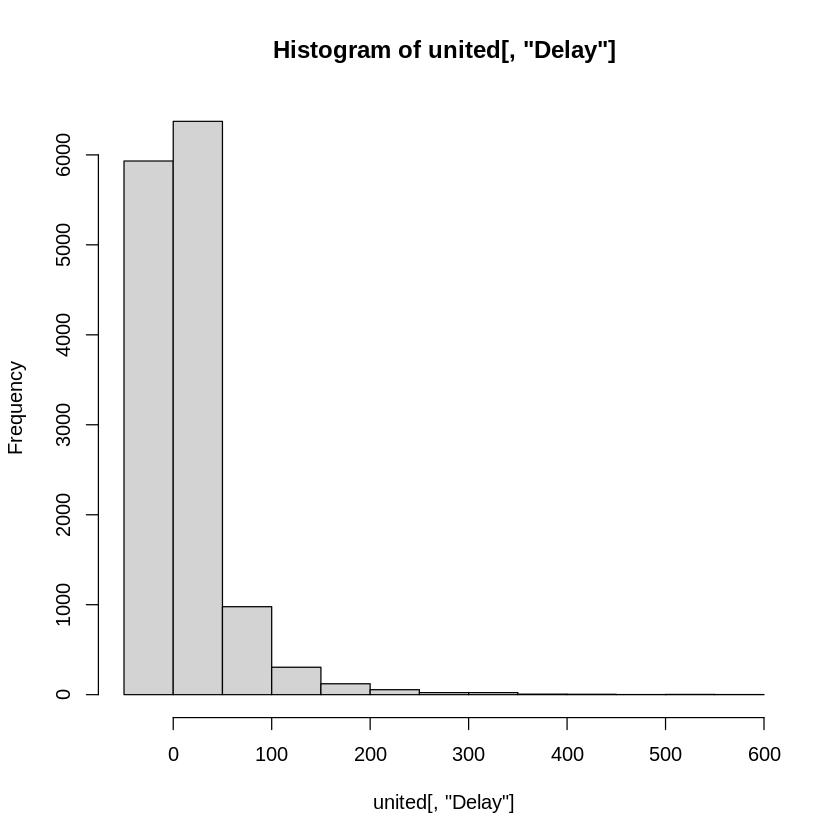

In [17]:
hist(united[ , 'Delay'])

**Histograms and Bin Widths**

We have too few bars in our histogram. We can control how many bars are produced (and the bin width or interval width along the $x$-axis) with the **breaks** option. Try seveal values between 50 and 150 to see which shows the best picture of this distribution.

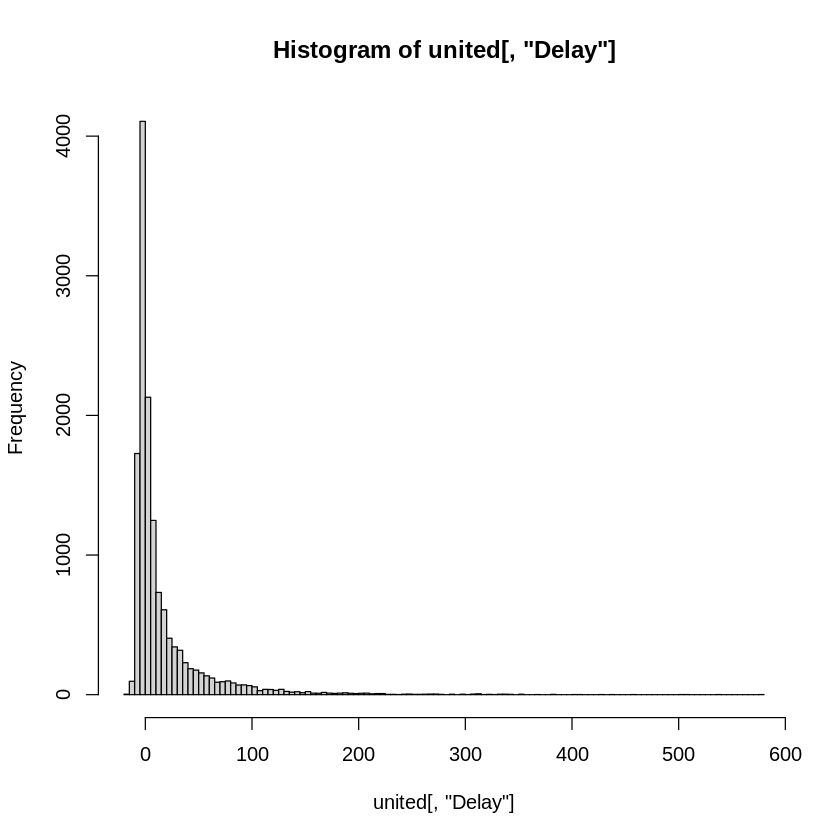

In [18]:
hist(united[ , 'Delay'], breaks = 100)

### Average

We also want to the overall average delay for the population.

In [19]:
mean(united[ , 'Delay'])

[1] 16.65816

### Your Task

With the **Narcissism** example as a guide, use sampling distributions to estimate the average delay. Use the following sample sizes, at a minimum:

1. 10
2. 25
3. 50
4. 100
5. 250

## Example 2: World Airports and Elevation

The data summarized below contains information inlcuding city, GPS coordinates, and elevation for every airport in the world from approximately 2020. More than 55,000 airports have been incuded in the data set.

In [21]:
head(airports, 5)

,name,code,type,elevation_ft,continent,country,region,city,lat,long
,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Total Rf Heliport,00A,heliport,11,NA,US,US-PA,Bensalem,40.07080,-74.9336
2,Aero B Ranch Airport,00AA,small_airport,3435,NA,US,US-KS,Leoti,38.70402,-101.4739
3,Lowell Field,00AK,small_airport,450,NA,US,US-AK,Anchor Point,59.94920,-151.6960
4,Epps Airpark,00AL,small_airport,820,NA,US,US-AL,Harvest,34.86480,-86.7703
5,Newport Hospital & Clinic Heliport,,closed,237,NA,US,US-AR,Newport,35.60870,-91.2549


### Distribution and Mean

Again, let's print the mean and display a histogram of the distribution we're investigating. Note that the mean calcuation fails. To see why, let's look at the vector of value.

In [33]:
cat('The average elevation in feet above sea level: ', mean(airports[ , 'elevation_ft']))

The average elevation in feet above sea level:  NA

In [34]:
airports[ , 'elevation_ft']

[1]    11  3435   450   820   237  1100  3810  3038    87  3350  4830    53
   [13]    25    35   700   957    43  2064  3359   600   840   634   820  1100
   [25]  1265    15   600    12    45   588  1365   970  2600   105   348    78
   [37]    96  1000   785   905   960   195   402  1301   815  1620   150  1590
   [49]   598   600  1100   670    19  6138   551  2680   719   150   860  2900
   [61]  2060  5210  3110  1950   120   344   400  3300   815  3733  2594   300
   [73] 10175    60    55    86    19   319   375   725  5268   950   583   890
   [85]   670    59  1157  1485   419    90   555   125   140    NA   608   736
   [97]  1358   615  3141    65  3000   835    10  3630  4600   100  1140  1525
  [109]  4346  1215   960  1040   779   630   505   370   675   610  5124  6000
  [121]   500   154   930   103    20  4250   715   500   190    61   264  4200
  [133]   122   165  5160  7615   540   121   215   884   710     9  1160  5634
  [145]   925   904   762  1170   781   760   168    25     9   141   700   850
  [157]  1070   650   153  3350  1550   809  1550  1180    78  4443   435   614
  [169]   950  1191   705   591  1070   390    15  1700   111  5830     5   560
  [181]   840   684  3235  4412   320  1850   690   920  2150   675   510   159
  [193]   150   628   350  4275   634  4950    70   115    20   238   680   954
  [205]  3180   465   750   850   580  1160   385    25    79   165   150   302
  [217]   556   585  1435  1010   110  3580   874     4    35  1045  2430   400
  [229]   360  6120    95   580   890   890  3340   197   479   980  1050   704
  [241]    73   505   600  1000  1825    50  5315   250  2440   880  2320  2100
  [253]   250   686   430  5515  3020  2310   880  1293     9    37    30   920
  [265]   801  2343   765   755   954   728   835   710    10   750    52   200
  [277]    40   625   880  1195   767   100  2715   445  3035   155  2620   250
  [289]   185  1080   984  1500    50   320   994  2437   540    49  1430   690
  [301]   565  6160  7826  2004    50  2156  1021  2345   760  1510  1137  1130
  [313]   625   620   365  1900   200   440   888   618  4978   600   295     6
  [325]    36   625  1155  2969   795   635   860   605   945  1070    76   710
  [337]    83   911    80    20    70  1446   272   359  4364    63  2010   200
  [349]     7  5180   445   830  1075  3500   110   485  1210   647   276   950
  [361]   285   750   608  4838  7720   445    68  2220   958  1570   105  1455
  [373]   425   415   499  1280   115  1942   520  5100    28   105     3  1065
  [385]   536   880  2750   708   575   695  1332   751    NA   812    85   210
  [397]   132   649   978  1463   755  3541   523   163  2180  1015   160    25
  [409]  5556  1100  1020  1160   915   900   850  1440   727   760   289  1340
  [421]   480   129   640   350   215  1160  2013  1075   394   546  1068   357
  [433]   132   300  1255   360   850   100  6620   430   764     8    90    18
  [445]   750   538  4580   740   750  1717  1321   532    NA    80   149   700
  [457]   250  1065  1680   880  2762   470   625  1404    10  5120  1320  1025
  [469]  1322   250  1690  1965    30    39   970   690   660  4480   350   801
  [481]  2110   990   840  1289   200     8   206  1240    65  1810  1025   270
  [493]  5600   881   615    35    65   103   960    12  2680   943   643   812
  [505]   400  1250   435   820     4   665    51   360   470   554  1019  1372
  [517]   955   345  3450   550   750  1990  1467   574   429   650  1230   635
  [529]  1518  4990  1812   310   130  1208  1447   820   420  1040  6397  1000
  [541]     2  1225   280    45  5742   228   310  4970   320  2275   272  4180
  [553]   130    71    60   230  1110   820  3835   880   610   850   874   970
  [565]   531     2  1000   181   403   260   842  1060  1210   450   310  1250
  [577]   100   561   254   700   487  1780   480  2614   923   787   924  3100
  [589]  2522  2375  1390    10  2081   705   710   687   292    65   305   800
  [6

When we inspect the vector values, we see a good amount of <NA> entries where the elevation data for that airport is not available. We can use the **na.rm** function which means, **"remove the NA values before calculation"**.

In [35]:
mean(airports[ , 'elevation_ft'], na.rm = TRUE)

[1] 1252.793

Now, we can print out the mean and display a histogram of the distribution in one code block:

The average elevation in feet above sea level:  1252.793

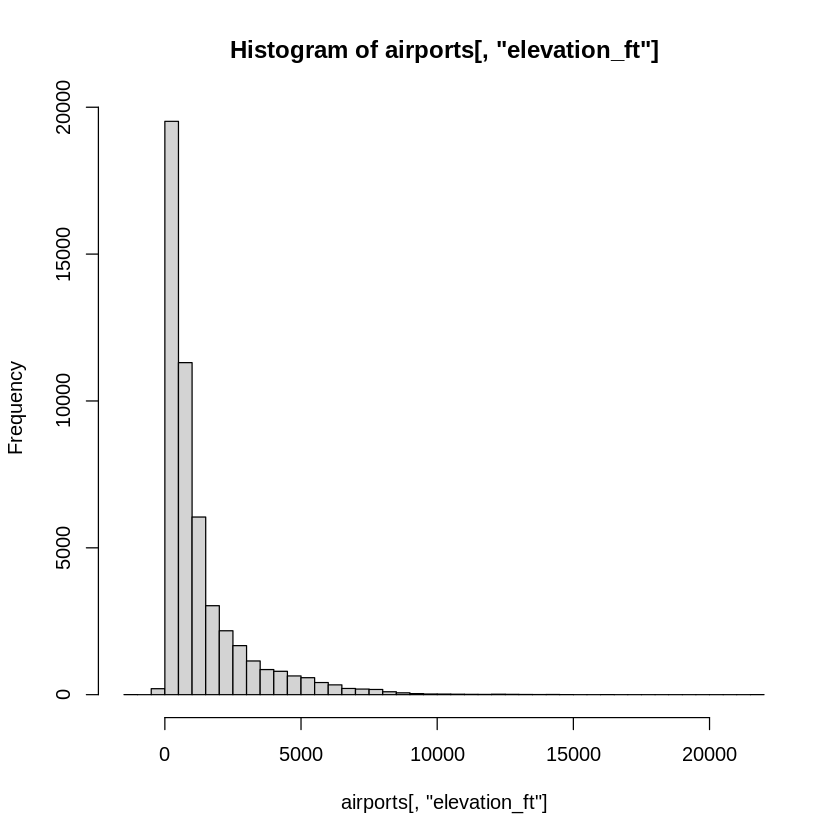

In [38]:
cat('The average elevation in feet above sea level: ', mean(airports[ , 'elevation_ft'], na.rm = TRUE))
hist(airports[ , 'elevation_ft'], breaks = 75)

### Your Task

With the above examples as a guide, use sampling distributions to estimate the average delay. Use the following sample sizes, at a minimum:

1. 25
2. 50
3. 100
4. 250
5. 500
6. 800

### Example 3: Birth Weight of Babies

With the above examples as a guide, use sampling distributions to estimate the average birth weights of babies. Use the following sample sizes, at a minimum:

1. 5
2. 10
3. 20
4. 50
5. 75

In [44]:
head(births, 5)

,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
,<int>,<int>,<int>,<int>,<int>,<chr>
1,120,284,27,62,100,False
2,113,282,33,64,135,False
3,128,279,28,64,115,True
4,108,282,23,67,125,True
5,136,286,25,62,93,False


In [45]:
nrow(births)

[1] 1174